In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%timeit ,  line_profiler, memory_profiler

In [4]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.collocations import *
import re

In [5]:
#polar = pd.read_csv('AFINN-111.txt', sep="\t", header=None)
polar = pd.read_csv('data/senticon_es.csv')
polar.head()#.columns = ["polaritat", "valor"]

,level,orient,lemma,pos,pol,std
0,1,positive,acertado,a,0.708,0.149
1,1,positive,admirable,a,0.906,0.125
2,1,positive,admiración,n,0.450,0.331
3,1,positive,admirar,v,0.750,0.177
4,1,positive,afectivo,a,0.375,0.000


In [6]:
GEN = pd.read_csv('data/1_GEN_clean.csv')
GEN.head()
REV = pd.read_csv('data/66_REV_clean.csv')
REV.head()

,book,chapter,verse,text,version
0,GEN,1,1,"Dios, en el principio, creó los cielos y la ti...",NVI
1,GEN,1,2,"La tierra era un caos total, las tinieblas cub...",NVI
2,GEN,1,3,Y dijo Dios: «¡ Que exista la luz ! »Y la luz ...,NVI
3,GEN,1,4,Dios consideró que la luz era buena y la separ...,NVI
4,GEN,1,5,"A la luz la llamó «día», y a las tinieblas, «n...",NVI


,book,chapter,verse,text,version
0,REV,1,1,"Esta es la revelación de Jesucristo, que Dios ...",NVI
1,REV,1,2,"quien por su parte da fe de la verdad, escribi...",NVI
2,REV,1,3,Dichoso el que lee y dichosos los que escuchan...,NVI
3,REV,1,4,"Yo, Juan, escribo a las siete iglesias que est...",NVI
4,REV,1,5,"y de parte de Jesucristo, el testigo fiel, el ...",NVI


In [7]:
list_gen = GEN.text.to_list()
list_rev = REV.text.to_list()

In [8]:
list_gen[:2]
list_rev[:2]

['Dios, en el principio, creó los cielos y la tierra.',
 'La tierra era un caos total, las tinieblas cubrían el abismo, y el Espíritu de Dios se movía sobre la superficie de las aguas.']

['Esta es la revelación de Jesucristo, que Dios le dio para mostrar a sus siervos lo que sin demora tiene que suceder. Jesucristo envió a su ángel para dar a conocer la revelación a su siervo Juan, ',
 'quien por su parte da fe de la verdad, escribiendo todo lo que vio, a saber, la palabra de Dios y el testimonio de Jesucristo. ']

In [9]:
def candidates(list_sentences):
    sh_tag = [ tag_tokenizer(line) for line in(list_sentences)]
    sh_np = [t for t in(sh_tag)]
    sh_words = to_words(sh_np)
    return sh_words

In [10]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

def get_tokens(text):
    # aquest tokenizer extreurà els caracters de puntuació
    return tokenizer.tokenize(text.lower())

def token_filter(tokens):
    stop_words = nltk.corpus.stopwords.words('spanish')
    word_tokens = [word for word in tokens if word not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}',word)]
    return word_tokens

def tag_tokenizer(text):
    tokens = get_tokens(text)
    tokens = token_filter(tokens)
    tagged_tokens = tagged_pos(tokens)
    return tagged_tokens

def tagged_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return tagged_tokens

In [11]:
def to_words(data_list):
    ret=[]
    for line in(data_list):
        med=[]
        for w in line:
            #print(w)
            tx=''
            for el in w:
                if type(el) is tuple:
                    tx += " "+el[0]
                else:
                    tx=w[0]
            tx = tx.strip()
            med.append(tx)
        if len(med)>0:
               ret.append(med)
    return ret

In [13]:
cand_gen = candidates(list_gen)

In [14]:
len(list_rev)

cand_rev = candidates(list_rev)

len(cand_rev)

382

382

In [88]:
cand_gen[:1]
cand_rev[:1]

[['dios', 'principio', 'creó', 'cielos', 'tierra']]

[['revelación',
  'jesucristo',
  'dios',
  'dio',
  'mostrar',
  'siervos',
  'demora',
  'suceder',
  'jesucristo',
  'envió',
  'dar',
  'conocer',
  'revelación',
  'siervo',
  'juan']]

In [16]:
def calculate_mean_opinions(polar, candidats):
    ret=[]
    diccio = dict(zip(polar.lemma, polar.pol))
    for i,text in enumerate(candidats):
        mitj = 0
        val = 0
        count_opinion = 0
        #print('text:'+" ".join(text))
        for j,word in enumerate(text):
            #print(word)
            if diccio.get(word) == None:
                val = 0
                #print('not in dic')
            else: 
                val = diccio.get(word)
                count_opinion += 1
            mitj += val
        #print('m='+str(mitj))
        if count_opinion:
            ret.append ( float(mitj/count_opinion))
        else:
            ret.append(0)
    print('n='+str(i))    
    return ret

In [17]:
opinions_gen = calculate_mean_opinions(polar, cand_gen)

n=1482


In [18]:
len(cand_rev)
cand_rev[:1]

382

[['revelación',
  'jesucristo',
  'dios',
  'dio',
  'mostrar',
  'siervos',
  'demora',
  'suceder',
  'jesucristo',
  'envió',
  'dar',
  'conocer',
  'revelación',
  'siervo',
  'juan']]

In [19]:
opinions_rev = calculate_mean_opinions(polar, cand_rev)

n=381


In [20]:
opinions_gen[:5]

[0, -0.25, 0.25, 0, 0]

In [21]:
opinions_rev[:5]

[0, 0.3, -0.3125, 0, 0.2333333333333333]

In [22]:
GEN['opinions']=opinions_gen

In [23]:
GEN.head(2)

,book,chapter,verse,text,version,opinions
0,GEN,1,1,"Dios, en el principio, creó los cielos y la ti...",NVI,0.00
1,GEN,1,2,"La tierra era un caos total, las tinieblas cub...",NVI,-0.25


In [24]:
len(REV)
len(opinions_rev)

382

382

In [25]:
REV['opinions']=opinions_rev
REV['y'] = np.where(REV['opinions']<0,-1,(np.where(REV['opinions']>0,1,0)))

In [26]:
REV.head()

,book,chapter,verse,text,version,opinions,y
0,REV,1,1,"Esta es la revelación de Jesucristo, que Dios ...",NVI,0.000000,0
1,REV,1,2,"quien por su parte da fe de la verdad, escribi...",NVI,0.300000,1
2,REV,1,3,Dichoso el que lee y dichosos los que escuchan...,NVI,-0.312500,-1
3,REV,1,4,"Yo, Juan, escribo a las siete iglesias que est...",NVI,0.000000,0
4,REV,1,5,"y de parte de Jesucristo, el testigo fiel, el ...",NVI,0.233333,1


In [26]:
def dic_bow(list_list):
    dic={}
    for alist in list_list:
        for w in alist:
            if w in dic:
                dic[w]=dic[w]+1
            else:
                dic[w]=1
    return dic              

In [27]:
#d_gen = dic_bow(cand_gen)
#d_rev = dic_bow(cand_rev)

In [30]:
'''
copy_GEN = GEN.copy()
copy_REV = REV.copy()

def drop_if0(df):
    indexNames = df[ df['opinions'] == 0 ].index
    df.drop(indexNames , inplace=True)
    return df

copy_GEN = drop_if0(copy_GEN)
len(copy_GEN)
'''

649

In [6]:
#!pip install wordcloud

In [38]:
def dic_from_text(text):
    dic={}
    t = text.split(" ")
    for w in t:
        if w in dic:
            dic[w]=dic[w]+1
        else:
            dic[w]=1
    return dic              

In [30]:
from wordcloud import WordCloud
# crea el núvol d'etiquetes:
def create_cloud(txt):
    wordcloud = WordCloud(background_color='paleturquoise',max_font_size=90).generate(txt)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [128]:
def plain_text(list_list):
    txt = ''
    for alist in list_list:
        for w in alist:
            if w =='dio':
                w='dar'
            if w not in ['dijo']:
                txt += w +" "
    return txt   

In [129]:
rv = plain_text(cand_rev)
dic_rv = dic_from_text(rv)
dic_rv['dar']
dic_rv['dios']

13

96

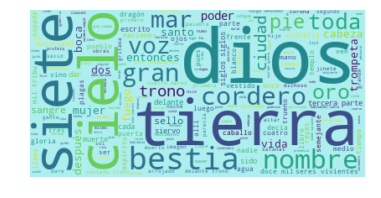

In [130]:
create_cloud(rv)

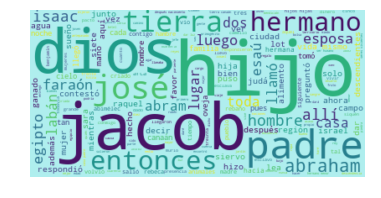

In [131]:
create_cloud(plain_text(cand_gen))

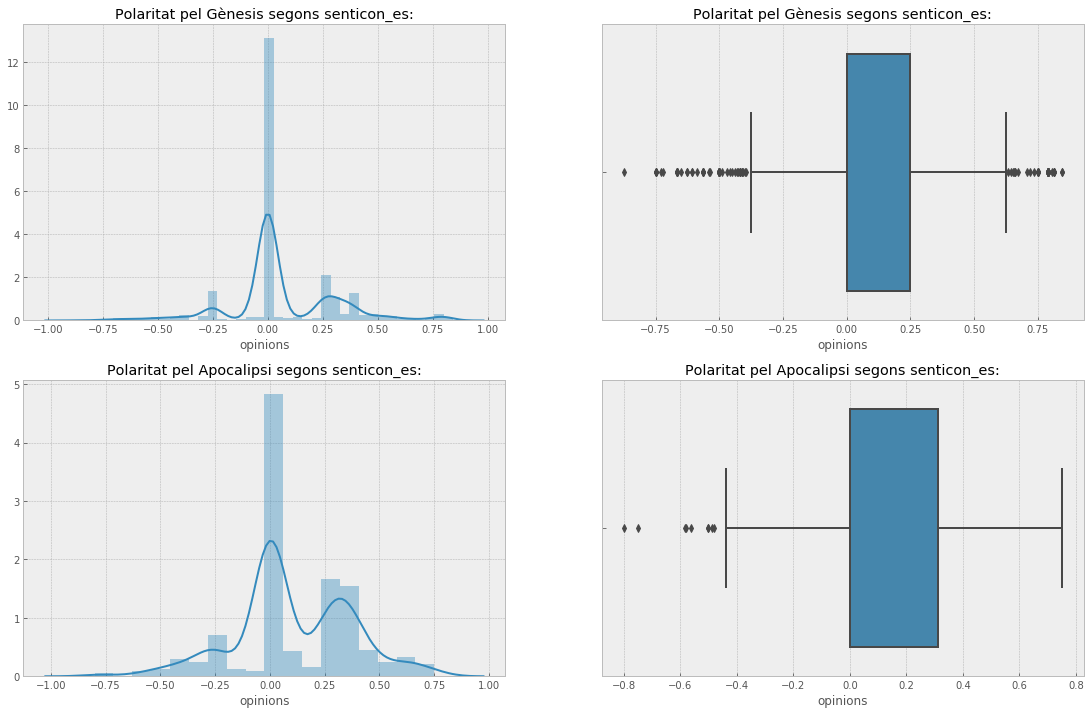

In [117]:
plt.figure(num=None, figsize=(19, 12))
plt.style.use('bmh')
plt.subplot(2,2,1)
plt.title("Polaritat pel Gènesis segons senticon_es:")
ax = sns.distplot(GEN['opinions'])
plt.subplot(2,2,2)
plt.title("Polaritat pel Gènesis segons senticon_es:")
ax = sns.boxplot(x=GEN['opinions'])
plt.subplot(2,2,3)
plt.title("Polaritat pel Apocalipsi segons senticon_es:")
ax = sns.distplot(REV['opinions'])
plt.subplot(2,2,4)
plt.title("Polaritat pel Apocalipsi segons senticon_es:")
ax = ax = sns.boxplot(x=REV['opinions'])
plt.show();

        Normality QQPlot for Genesis:


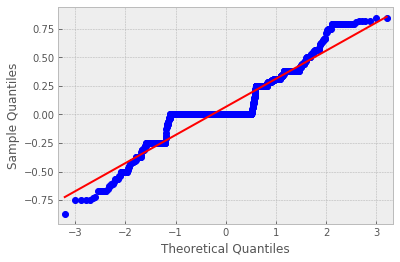

In [118]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
print("        Normality QQPlot for Genesis:")
# q-q plot
#plt.title("Normality QQPlot for Genesis:");
plt.style.use('bmh')
ax = qqplot(GEN['opinions'], line='s')
#plt.show()

        Normality QQPlot for Revelations:


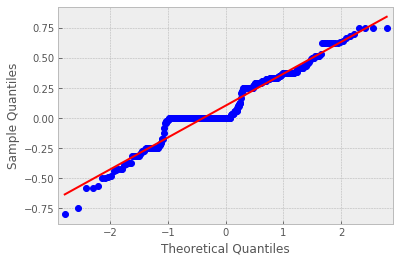

In [119]:
print("        Normality QQPlot for Revelations:");
plt.style.use('bmh')
ax = qqplot(REV['opinions'], line='s')
#plt.show()

In [80]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

def test_sh_normality(data, title):
    # normality test
    t = title + ': Shapiro-Wilk Test (Normality)'
    print(t)
    print('-'*len(t))
    stat, p = shapiro(data)
    print('Statistics=%.4f, p=' % (stat), p)
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    print("")

In [81]:
test_sh_normality(GEN['opinions'],'Genesis')
test_sh_normality(REV['opinions'],'Apocalipsis')

Genesis: Shapiro-Wilk Test (Normality)
--------------------------------------
Statistics=0.8635, p= 4.6787512879558325e-34
Sample does not look Gaussian (reject H0)

Apocalipsis: Shapiro-Wilk Test (Normality)
------------------------------------------
Statistics=0.9442, p= 8.464775408389968e-11
Sample does not look Gaussian (reject H0)



In [83]:
from scipy.stats import levene
stat, p_value = levene(GEN['opinions'], REV['opinions'])
# H0: μ1 = μ2
# The Levene test tests the null hypothesis that all input
# samples are from populations with equal variances. It is more robust than 
# Fischer(needs to be Gaussian) and Barlett
title = 'Levene test for independence variables'
print (title)
print('-'*len(title))
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis that Var(X) == Var(Y), then they are independents')

Levene test for independence variables
--------------------------------------
Statistics=18.200, p=0.000
Reject the null hypothesis that Var(X) == Var(Y), then they are independents


In [87]:

# Student's t-test

from scipy.stats import ttest_ind
# seed the random number generator

# generate two independent samples
data1 = GEN['opinions']
data2 = REV['opinions']
# compare samples
stat, p = ttest_ind(data1, data2)

alpha = 0.025

title = 't-Student test for independent variables'
print (title)
print('-'*len(title))
print('H0: GEN opinions > REV opinions')
print('alpha = alpha /2 = '+str(alpha))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret


if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

t-Student test for independent variables
----------------------------------------
H0: GEN opinions > REV opinions
alpha = alpha /2 = 0.025
Statistics=-2.787, p=0.005
Different distributions (reject H0)


In [86]:
from scipy.stats import ttest_ind
# t-test ind ependent
# # H0: μ1 >= μ2
# les variances ens diuen que son iguals
alpha2 = 0.025
ttest_ind(data1, data2)#, equal_var=True)
np.std(data1)
np.std(data2)

Ttest_indResult(statistic=-2.7867754000904474, pvalue=0.005377515366691982)

0.2459738282720824

0.26454338269987215